In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

register(
    id = 'FrozenLake-v3',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs = {'map_name' : '4x4',
             'is_slippery' : False}
)

env = gym.make('FrozenLake-v3')

#Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])
#Discount factor
dis = .99
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []

# Q learning
for i in range(num_episodes) :
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False
    
    # The Q-Table learning algorithm
    while not done :
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))
        
        new_state, reward, done,_ = env.step(action)
        
        Q[state, action] = reward + dis * np.max(Q[new_state, :])
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)

[2017-10-11 14:48:58,194] Making new env: FrozenLake-v3


Success rate : 0.8355
Final Q-Table Values
[[ 0.          0.95099005  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.970299    0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.96059601  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.9801      0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.970299    0.        ]
 [ 0.          0.          0.9801      0.        ]
 [ 0.          0.99        0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.        ]]


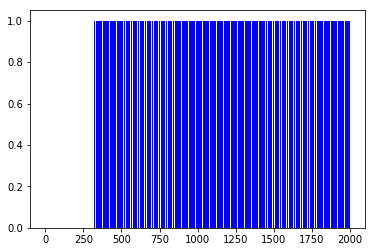

In [2]:
print("Success rate : " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

In [3]:
e = 1. / ((i // 100) + 1)

while not done :
    if np.random.rand(1) < e:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])